In [1]:
%matplotlib inline

import pandas
import numpy
from sklearn import linear_model
import matplotlib.pyplot as plt
import Support
import seaborn

In [2]:
data1 = Support.get_data('ex2data1.txt')
data1.columns = ['exam1','exam2','admitted to uni']


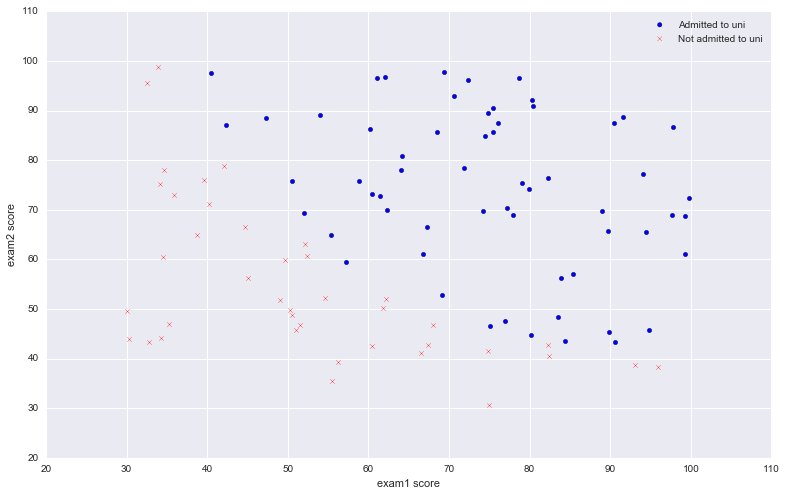

In [3]:
fig, ax = plt.subplots(figsize=(13,8))
ax.set_xlabel('exam1 score')
ax.set_ylabel('exam2 score')
ax.scatter(data1['exam1'][data1['admitted to uni']==1],data1['exam2'][data1['admitted to uni']==1],c='b')
ax.scatter(data1['exam1'][data1['admitted to uni']==0],data1['exam2'][data1['admitted to uni']==0],marker='x',c='r')
ax.legend(['Admitted to uni','Not admitted to uni'])

In [4]:
log_reg = linear_model.LogisticRegression()
log_reg.fit(data1.loc[:,'exam1':'exam2'],data1['admitted to uni'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
log_reg.score(data1.loc[:,'exam1':'exam2'],data1['admitted to uni'])

0.87

In [6]:
log_gdreg = Support.fit_GDregression(data1.loc[:,'exam1':'exam2'],data1['admitted to uni'],\
                                     alpha=0.01,n_iter= 10000,typ='log',los='log')

accuracy is: 0.89


In [20]:
data1.loc[:,'prediction'] = log_gdreg.predict(data1.loc[:,'exam1':'exam2'])

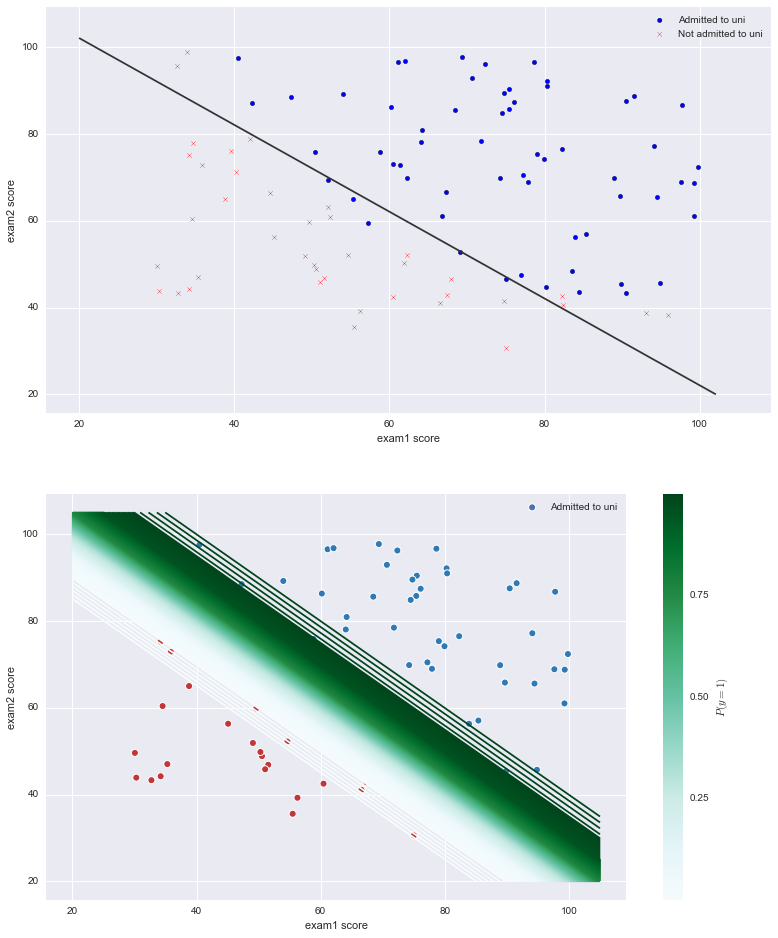

In [67]:
# plotting decision boundary
# arrays of (x ,y) corordinates on the chart
xx, yy = numpy.mgrid[20:110:5, 20:110:5]
grid = numpy.c_[xx.ravel(), yy.ravel()]
probs = log_gdreg.predict_proba(grid)[:, 1].reshape(xx.shape)

fig, (ax,ax2) = plt.subplots(2,1,figsize=(13,16))
ax.set_xlabel('exam1 score')
ax.set_ylabel('exam2 score')
ax2.set_xlabel('exam1 score')
ax2.set_ylabel('exam2 score')
ax.scatter(data1['exam1'][data1['admitted to uni']==1],data1['exam2'][data1['admitted to uni']==1],c='b')
ax.scatter(data1['exam1'][data1['admitted to uni']==0],data1['exam2'][data1['admitted to uni']==0],marker='x',c='r')
ax.legend(['Admitted to uni','Not admitted to uni'])
ax.contour(xx,yy,probs, levels=[.5], vmin=0, vmax=.6)

ax2.scatter(data1['exam1'],data1['exam2'],c=data1['admitted to uni'],cmap='RdBu',vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1,s=50)

ax2.legend(['Admitted to uni','Not admitted to uni'])
contour = ax2.contour(xx,yy,probs,990,cmap='BuGn',vmin=0,vmax=1)

ax_c = fig.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])



In [63]:
data2 = Support.get_data('ex2data2.txt')
data2.columns = ['Microchip test1','Microchip test2','QA']

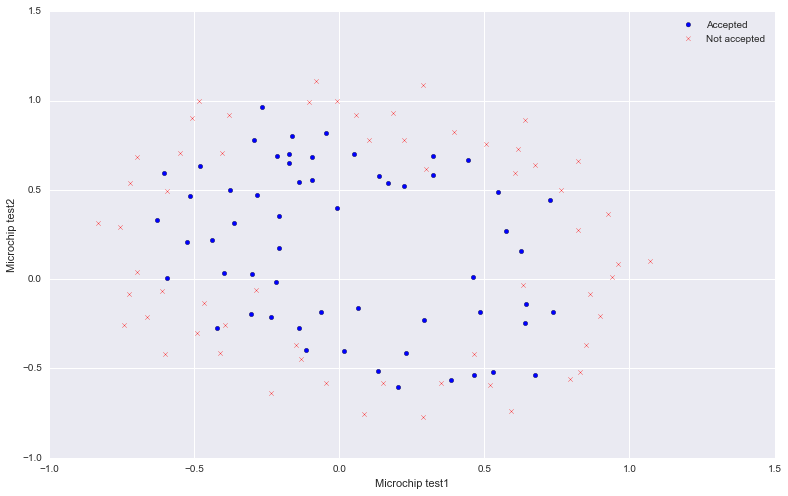

In [64]:
fig, ax = plt.subplots(figsize=(13,8))
ax.set_xlabel('Microchip test1')
ax.set_ylabel('Microchip test2')
ax.scatter(data2['Microchip test1'][data2['QA']==1],data2['Microchip test2'][data2['QA']==1],c='b')
ax.scatter(data2['Microchip test1'][data2['QA']==0],data2['Microchip test2'][data2['QA']==0],marker='x',c='r')
ax.legend(['Accepted','Not accepted'])